## SEQIJR model
![](https://github.com/francescocicala/stochastic-modelling-playground/blob/master/images/seqijr.png?raw=true)
Sketch by Prof. Bortolussi

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from evolve import evolve, show

# Derivatives definition
def S_dot_f(state, beta, epsilon_E, epsilon_Q, epsilon_J):
    infectious = epsilon_E * state[1] + epsilon_Q * state[2] \
                + state[3] + epsilon_J * state[4]
    outcoming = beta * state[0] * infectious
    return - outcoming 

def E_dot_f(state, beta, epsilon_E, epsilon_Q, epsilon_J, k_1, gamma_1):
    infectious = epsilon_E * state[1] + epsilon_Q * state[2] \
                + state[3] + epsilon_J * state[4]
    incoming = beta * state[0] * infectious
    outcoming = (k_1 + gamma_1) * state[1]
    return incoming - outcoming

def Q_dot_f(state, k_2, gamma_1):
    incoming = gamma_1 * state[1]
    outcoming = k_2 * state[2]
    return incoming - outcoming

def I_dot_f(state, alpha_1, k_1, gamma_2):
    incoming = k_1 * state[1]
    outcoming = (alpha_1 + gamma_2) * state[3]
    return incoming - outcoming

def J_dot_f(state, alpha_2, epsilon_J, k_2, gamma_2, f_2):
    incoming = k_2 * state[2] + gamma_2 * state[3]
    outcoming = alpha_2 * state[4]
    return incoming - outcoming

def R_dot_f(state, alpha_1, alpha_2, f_1, f_2):
    incoming = alpha_1 * f_1 * state[3] + alpha_2 * f_2 * state[4]
    return incoming

def N_dot_f(state, alpha_1, alpha_2, f_1, f_2):
    outcoming = alpha_1 * (1 - f_1) * state[3] + alpha_2 * (1 - f_2) * state[4]
    return - outcoming

def deriv(state, t, alpha_1, alpha2, beta, epsilon_E, epsilon_Q, epsilon_J,
          k_1, k_2, gamma_1, gamma_2, f_1, f_2):
    S_dot = S_dot_f(state, beta, epsilon_E, epsilon_Q, epsilon_J)
    E_dot = E_dot_f(state, beta, epsilon_E, epsilon_Q, epsilon_J, k_1, gamma_1)
    Q_dot = Q_dot_f(state, k_2, gamma_1)
    I_dot = I_dot_f(state, alpha_1, k_1, gamma_2)
    J_dot = J_dot_f(state, alpha_2, epsilon_J, k_2, gamma_2, f_2)
    R_dot = R_dot_f(state, alpha_1, alpha_2, f_1, f_2)
    N_dot = N_dot_f(state, alpha_1, alpha_2, f_1, f_2)
    return np.asarray([S_dot, E_dot, Q_dot, I_dot, J_dot, R_dot, N_dot])

In [15]:
# Parameters
alpha_1 = 0.001 # rate of people leaving the infected (dead or recovered)
alpha_2 = 0.01 # rate of people leaving the isolated (dead or recovered)
beta = 0.004 # rate of people leaving the susceptibles per infected
epsilon_E = 0.8 # rate of exposed people who are infectious
epsilon_Q = 0.3 # rate of quarantined people who are infectious
epsilon_J = 0.01 # rate of isolated people who are infectious
k_1 = 0.1 # rate of exposed people who become infected
k_2 = 0.01 # rate of quarantined people who become isolated
gamma_1 = 0.01 # rate of exposed people who become quarantined
gamma_2 = 0.01 # rate of infected people who become isolated
f_1 = 0.5 # rate of people that stop being infected who survive
f_2 = 0.85 # rate of people that stop being isolated who survived
deriv_params = (alpha_1, alpha_2, beta, epsilon_E, epsilon_Q, epsilon_J,
                k_1, k_2, gamma_1, gamma_2, f_1, f_2) # same order as in the deriv function's arguments

# Initial conditions
N0 = 100
S0 = 98
E0 = 0
Q0 = 0
I0 = 2
J0 = 0
R0 = 0
state0 = np.asarray([S0, E0, Q0, I0, J0, R0, N0])

timelength = 1000
legend = ['susceptibles', 'exposed', 'quarantined', 'infected', 
          'isolated', 'removed', 'total pop']

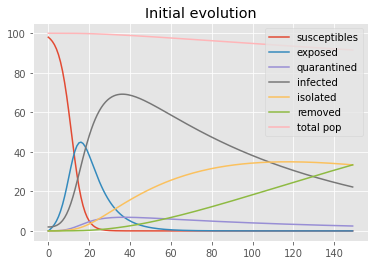

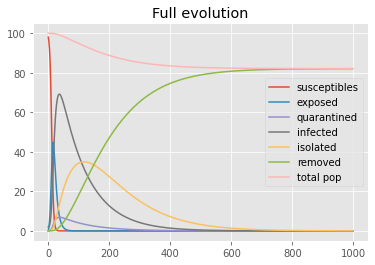

In [16]:
# evolve
history = evolve(deriv, state0, timelength, deriv_params)

# visualize
show(history, legend=legend, title='Initial evolution', last_t=150)
show(history, legend=legend, title='Full evolution')